## Demo of data_processing package

In [1]:
from data_processing import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
generate_economic_indicators()

cpi_month.csv is set
cpi_semiannual.csv is set
unemployment.csv is set
gdp.csv is set
fundrate_day.csv is set
fundrate_week.csv is set
fundrate_month.csv is set
retail.csv is set
durables.csv is set
All csv files are stored in /Users/amethyst/Desktop/DATA534_Project-Ame/data


In [3]:
for i in ['original', 'energy', 'industry', 'consumer']:
    generate_SP500_index(index = i, interval = '1mo')

[*********************100%***********************]  1 of 1 completed
SP500_original.csv is saved in /Users/amethyst/Desktop/DATA534_Project-Ame/data
[*********************100%***********************]  1 of 1 completed
SP500_energy.csv is saved in /Users/amethyst/Desktop/DATA534_Project-Ame/data
[*********************100%***********************]  1 of 1 completed
SP500_industry.csv is saved in /Users/amethyst/Desktop/DATA534_Project-Ame/data
[*********************100%***********************]  1 of 1 completed
SP500_consumer.csv is saved in /Users/amethyst/Desktop/DATA534_Project-Ame/data


In [4]:
SP500_month = pd.read_csv('data/SP500_original.csv', parse_dates=['date'])
SP500_month.head()

,date,Close
0,1985-01-01,179.630005
1,1985-02-01,181.179993
2,1985-03-01,180.660004
3,1985-04-01,179.830002
4,1985-05-01,189.550003


In [5]:
SP500_industry = pd.read_csv('data/SP500_industry.csv', parse_dates=['date'])
SP500_industry.head()

,date,Close
0,1993-06-01,97.379997
1,1993-07-01,98.089996
2,1993-08-01,101.400002
3,1993-09-01,99.589996
4,1993-10-01,100.599998


In [6]:
cpi_month = pd.read_csv('data/cpi_month.csv', parse_dates=['date'])
cpi_month.head()

,date,cpi_month
0,2022-12-01,296.797
1,2022-11-01,297.711
2,2022-10-01,298.012
3,2022-09-01,296.808
4,2022-08-01,296.171


In [7]:
fundrate_week = pd.read_csv('data/fundrate_week.csv', parse_dates=['date'])
fundrate_week.head()

,date,fundrate_week
0,2023-02-01,4.33
1,2023-01-25,4.33
2,2023-01-18,4.33
3,2023-01-11,4.33
4,2023-01-04,4.33


In [8]:
# select the time range for SP500
select_sp500 = subset(SP500_industry, start_time = '2020-01-12', end_time = '2022-12-30')
select_sp500.head()

,date,Close
320,2020-02-01,618.390015
321,2020-03-01,499.119995
322,2020-04-01,542.349976
323,2020-05-01,570.150024
324,2020-06-01,581.000000


In [9]:
select_sp500.tail()

,date,Close
343,2022-01-01,852.340027
344,2022-02-01,842.729980
345,2022-03-01,870.460022
346,2022-04-01,804.559998
347,2022-05-01,834.849976


In [10]:
# modify the SP500 (sector) index with moving average
select_sp500 = moving_average(df = select_sp500, col = 'Close', MA = 7)
select_sp500.head(10)

,date,Close,MA7_Close
320,2020-02-01,618.390015,NaN
321,2020-03-01,499.119995,NaN
322,2020-04-01,542.349976,NaN
323,2020-05-01,570.150024,NaN
324,2020-06-01,581.000000,NaN
325,2020-07-01,605.880005,NaN
326,2020-08-01,656.219971,581.872855
327,2020-09-01,650.679993,586.485709
328,2020-10-01,641.010010,606.755711
329,2020-11-01,741.250000,635.170000


## Demo of explore package

In [11]:
from explore import *

In [12]:
cpi_cols = get_numeric_cols(cpi_month)
cpi_cols

['cpi_month']

In [13]:
time_series_trend(cpi_month, cpi_cols, '2000-01-01','2022-01-01')

alt.RepeatChart(...)

In [14]:
boxplot_year(cpi_month, cpi_cols, [2008,2012])

alt.RepeatChart(...)

In [15]:
from functools import reduce
unemployment = pd.read_csv('data/unemployment.csv', parse_dates=['date'])
fundrate_month = pd.read_csv('data/fundrate_month.csv', parse_dates=['date'])
retail = pd.read_csv('data/retail.csv', parse_dates=['date'])
durables = pd.read_csv('data/durables.csv', parse_dates=['date'])
gdp = pd.read_csv('data/gdp.csv', parse_dates=['date'])
dfs = [cpi_month, unemployment, gdp, fundrate_month, retail, durables, SP500_month]
df_combined = reduce(lambda  left,right: pd.merge(left, right, on=['date'], how='outer'), dfs)
df_combined['gdp'] = df_combined['gdp'].interpolate(method='polynomial', order=2)
df_combined.dropna(inplace=True)
df_combined

,date,cpi_month,unemployment,gdp,fundrate_month,retail,durables,Close
2,2022-10-01,298.012,3.7,60422.000000,3.08,597349.0,273120.0,3871.979980
3,2022-09-01,296.808,3.5,60325.169854,2.56,577370.0,289932.0,3585.620117
4,2022-08-01,296.171,3.7,60211.169854,2.33,613416.0,279323.0,3955.000000
5,2022-07-01,296.276,3.5,60080.000000,1.68,600746.0,249456.0,4130.290039
6,2022-06-01,296.311,3.6,59931.660292,1.21,609933.0,294470.0,3785.379883
...,...,...,...,...,...,...,...,...
366,1992-06-01,140.200,7.8,37754.941468,3.76,151849.0,131268.0,408.140015
367,1992-05-01,139.700,7.6,37683.017658,3.82,152420.0,122274.0,415.350006
368,1992-04-01,139.500,7.4,37607.000000,3.73,147175.0,123268.0,414.950012
369,1992-03-01,139.300,7.4,37524.183732,3.98,142488.0,129309.0,403.690002


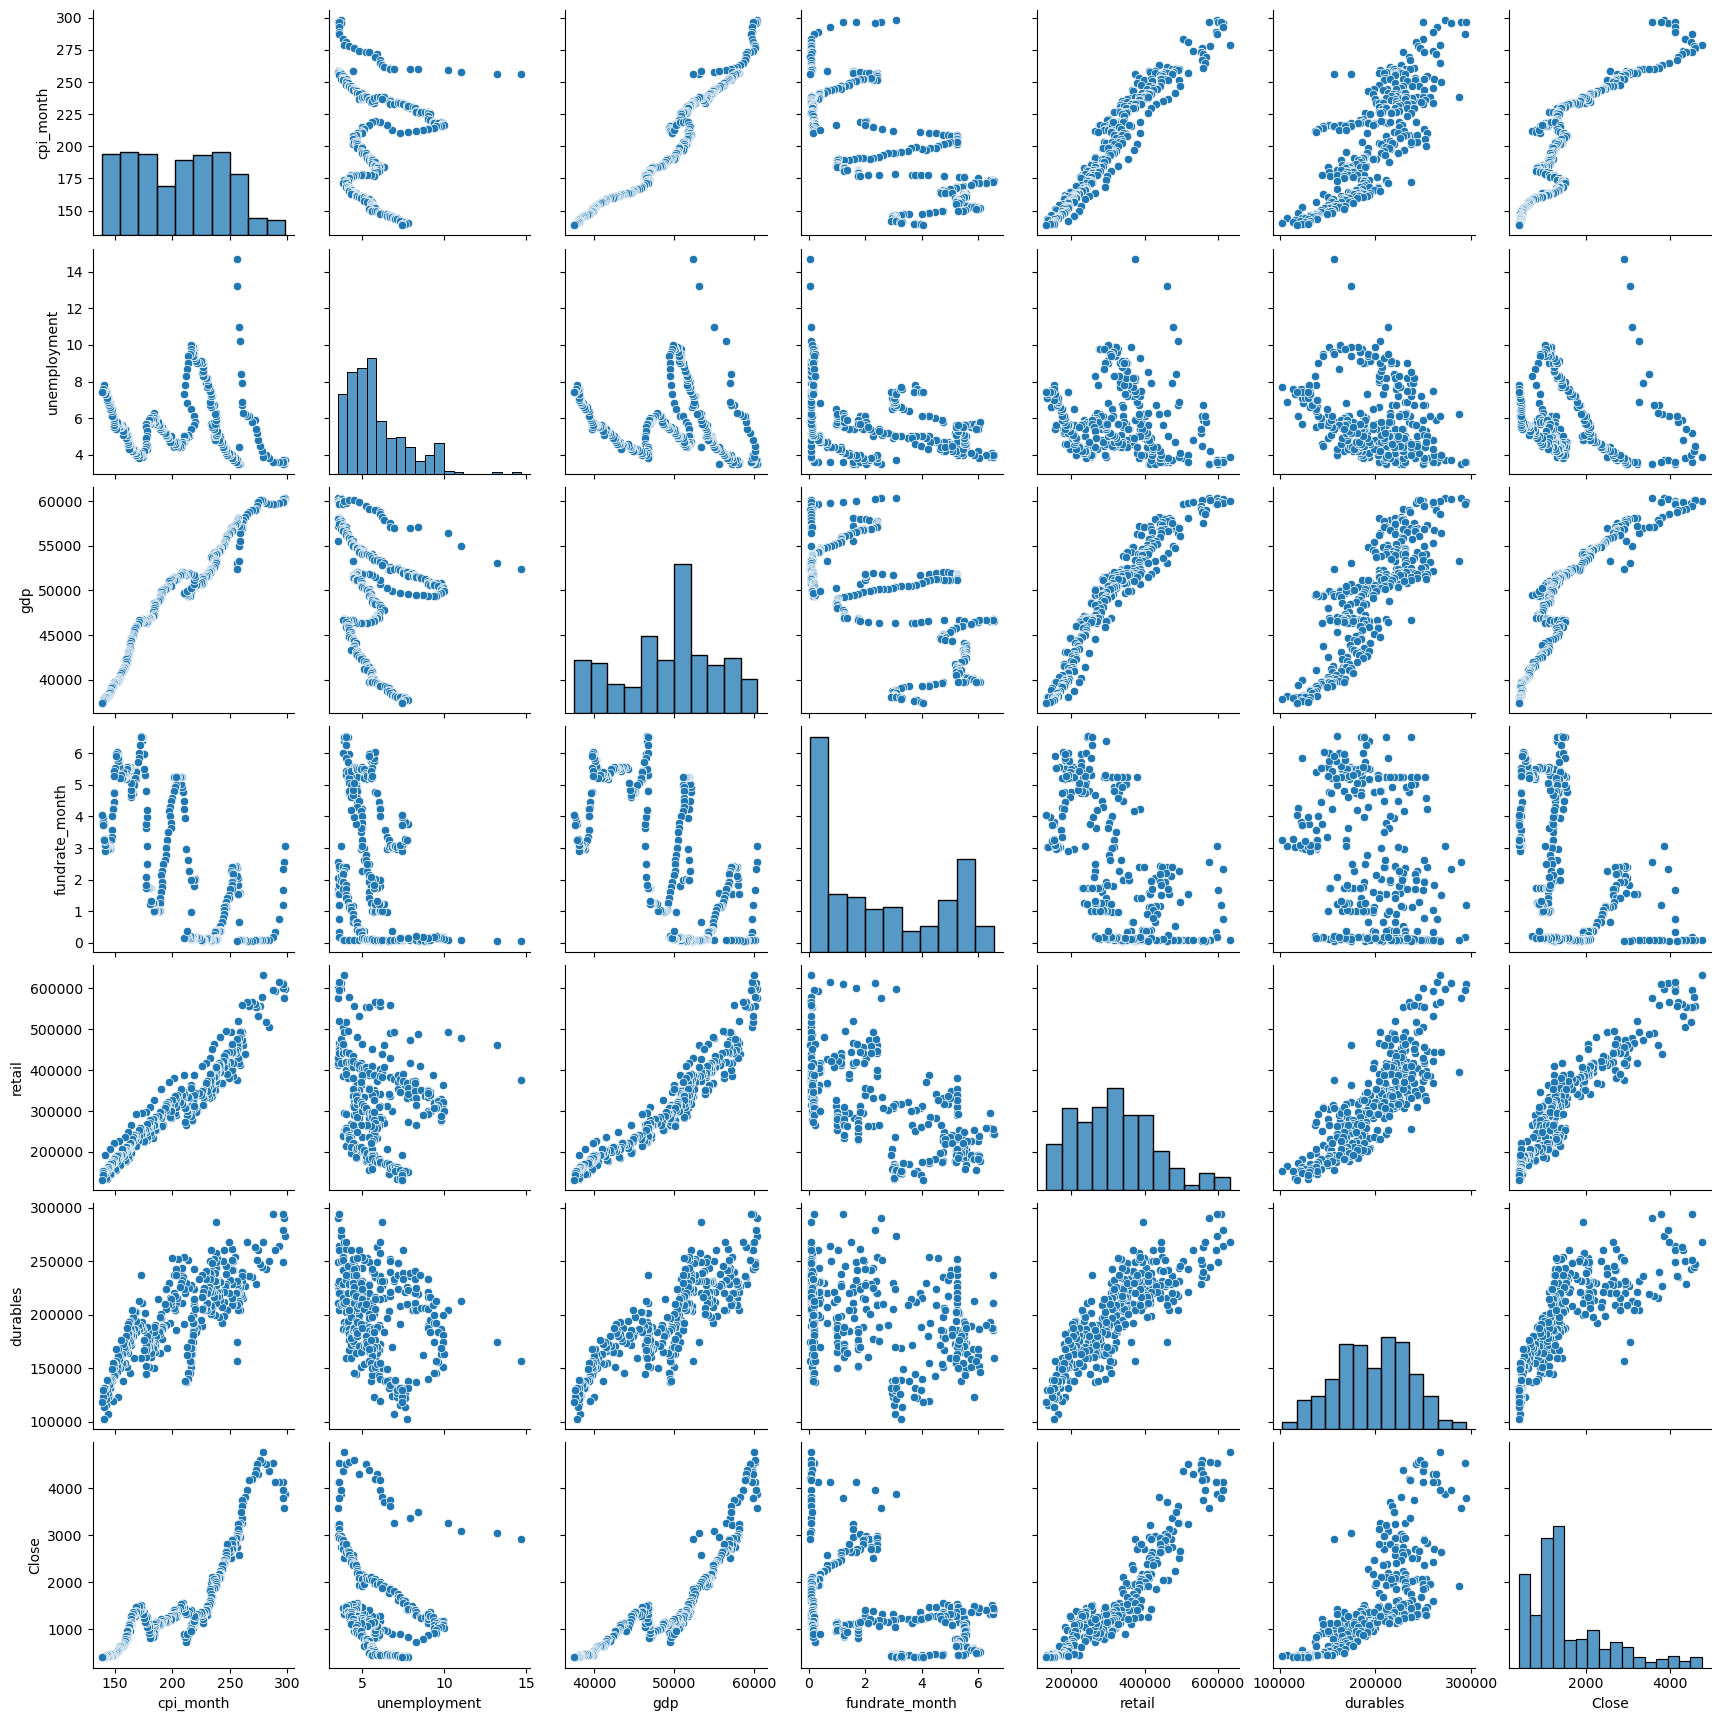

In [16]:
correlation_scatter(df_combined)

In [17]:
correlation_heatmap(df_combined)

alt.LayerChart(...)

## Demo of model package

In [18]:
from model import *

#### From above pairplot, we can see that there is a linear relationship between cpi_month and retail. Fit a linear model to check.

In [19]:
CPIRetail = pd.merge(cpi_month, retail, how = 'outer', on = 'date').dropna()
CPIRetail

,date,cpi_month,retail
0,2022-12-01,296.797,660004.0
1,2022-11-01,297.711,610784.0
2,2022-10-01,298.012,597349.0
3,2022-09-01,296.808,577370.0
4,2022-08-01,296.171,613416.0
...,...,...,...
367,1992-05-01,139.700,152420.0
368,1992-04-01,139.500,147175.0
369,1992-03-01,139.300,142488.0
370,1992-02-01,138.600,131244.0


In [20]:
import numpy as np

lm = LinearModel(CPIRetail, ['cpi_month'], 'retail', 0.2)
lm.get_summary()

{'MSE': 3793247590.04147,
 'Coefficients': [[2296.649134379978]],
 'Intercept': [-159519.72805901384],
 'Residuals':            retail
 0   137885.154922
 1    86566.017614
 2    72439.726224
 3    55225.891782
 4    92734.857281
 ..            ...
 69   22596.372448
 70  -34358.891023
 71  -29115.251085
 72   87037.134247
 73   19117.569529
 
 [74 rows x 1 columns],
 'Equation': 'retail = -159519.72805901384 + 2296.649134379978 * cpi_month',
 'R-Squared': 0.9021337410566294}

#### To investigate how economic indices affect SP500
1. Linear model

In [21]:
df_selected = subset(df_combined, '2008-01-01', '2022-12-01')
df_selected

,date,cpi_month,unemployment,gdp,fundrate_month,retail,durables,Close
2,2022-10-01,298.012,3.7,60422.000000,3.08,597349.0,273120.0,3871.979980
3,2022-09-01,296.808,3.5,60325.169854,2.56,577370.0,289932.0,3585.620117
4,2022-08-01,296.171,3.7,60211.169854,2.33,613416.0,279323.0,3955.000000
5,2022-07-01,296.276,3.5,60080.000000,1.68,600746.0,249456.0,4130.290039
6,2022-06-01,296.311,3.6,59931.660292,1.21,609933.0,294470.0,3785.379883
...,...,...,...,...,...,...,...,...
175,2008-05-01,216.632,5.4,51888.906155,1.98,357277.0,227995.0,1400.380005
176,2008-04-01,214.823,5.0,51923.000000,2.28,331002.0,225075.0,1385.589966
177,2008-03-01,213.528,5.1,51874.281439,2.61,334416.0,250906.0,1322.699951
178,2008-02-01,211.693,4.9,51766.260793,2.98,308171.0,229870.0,1330.630005


In [22]:
lm_SP500 = LinearModel(df_selected, get_numeric_cols(df_selected)[:-1], 'Close', 0.2)
lm_SP500.get_summary()

{'MSE': 465680.86188145005,
 'Coefficients': [[12.504315804433045,
   -15.949328281007183,
   0.1823514954567067,
   -12.49665485892465,
   3.8936805594858015e-05,
   -0.000315945034880194]],
 'Intercept': [-10623.999264714395],
 'Residuals':           Close
 2    -87.964717
 3   -345.210802
 4     48.482658
 5    226.123071
 6    -82.589026
 7    327.137505
 8    377.280915
 9    807.313492
 10   679.032038
 11   834.037846
 12  1089.006873
 13   871.275163
 14   937.518899
 15   721.383756
 16  1022.692649
 17   953.971896
 18   919.601782
 19   854.345250
 20   887.090518
 21   760.411665
 22   679.265469
 23   664.156312
 24   797.374787
 25   724.524318
 26   410.208850
 27   519.443487
 28   648.211828
 29   565.564417
 30   691.013812
 31  1035.620523
 32  1046.592454
 33   384.713351
 34   335.867145
 35   304.617026
 36   178.394403
 37    78.882314,
 'Equation': 'Close = -10623.999264714395 + 12.504315804433045 * cpi_month',
 'R-Squared': 0.98006598197401}

2. Random forest model 

In [23]:
rf_SP500 = RfModel(df_selected, get_numeric_cols(df_selected)[:-1], 'Close', 0.2)
rf_SP500.get_summary()

{'MSE': 1800859.9340755465,
 'Feature importances': array([0.21258676, 0.02978559, 0.70286577, 0.04682762, 0.00296473,
        0.00496953]),
 'Residuals':           Close
 2    928.872000
 3    623.476318
 4   1013.532415
 5   1163.749912
 6    828.642153
 7   1342.632493
 8   1429.875654
 9   1828.509832
 10  1719.638735
 11  1899.358799
 12  2142.924365
 13  1960.536494
 14  2019.937168
 15  1794.503628
 16  2005.301064
 17  1890.599447
 18  1789.090288
 19  1705.430256
 20  1685.967715
 21  1465.435082
 22  1317.832584
 23  1217.563480
 24  1280.187568
 25  1153.252872
 26   807.428361
 27   902.941399
 28  1043.576146
 29   800.362406
 30   804.294424
 31   905.393955
 32  1108.803036
 33   226.919885
 34   104.202651
 35   296.891003
 36   263.929902
 37   153.589258,
 'R-Squared': 0.9985453617960282}

## Demo of visualization package

In [24]:
from visualization import *

In [25]:
compare([lm_SP500, rf_SP500], 'date', 'Close')

alt.Chart(...)

In [26]:
compare([lm], 'cpi_month', 'retail')

alt.Chart(...)